In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [3]:
#Activity 6.01 - Evaluating Regression Models of Location Revenue Using the MAE & RMSE

#Load in the data
df = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter06/Exercise6.01/location_rev.csv')
df.head()

#Create training segments
X = df[['num_competitors',
        'median_income',
        'num_loyalty_members',
        'population_density',
        'location_age']]

y = df['revenue']

#Perfom train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 15)

#Create linear regression 
model = LinearRegression()
model.fit(X_train, 
          y_train)

#Get the models prediction
predictions = model.predict(X_test)

#Calc RMSE & MAE
print('RMSE (all): {}'.format(mean_squared_error(predictions, y_test) ** 0.5))
print('MAE (all): {}'.format(mean_absolute_error(predictions, y_test)))

#Rebuild model dropping num_competitors
X_train2 = X_train.drop('num_competitors', axis = 1)
X_test2 = X_test.drop('num_competitors' , axis = 1)

model.fit(X_train2, y_train)
predictions2 = model.predict(X_test2)

#Calclualte the RMSE & MAE of new model
print('RMSE (less competitors): {}'.format(mean_squared_error(predictions2, y_test) ** 0.5))
print('MAE (less competitors): {}'.format(mean_absolute_error(predictions2, y_test)))

RMSE (all): 5133.736391468814
MAE (all): 4161.387875602789
RMSE (less competitors): 5702.030002037039
MAE (less competitors): 4544.416946418695


In [4]:
#Activity 6.01  Finding Important Variables for Predicting response to a Marketing offer

#Read in the data
df = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter06/Activity6.01/offer_responses.csv')
df.head()

#Create training and test segments
X = df[['offer_discount',
        'offer_quality',
        'offer_reach']]
y = df['responses']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state = 10)

#Create the model
model = LinearRegression()
model.fit(X_train,
          y_train)

#Get predictions
predictions = model.predict(X_test)

#Calc RMSE 
print('RMSE (all): {}'.format(mean_squared_error(predictions, y_test) ** 0.5))

# Drop offer_quality and retrain
X_train2 = X_train.drop('offer_quality', axis=1)
X_test2 = X_test.drop('offer_quality', axis=1)

model2 = LinearRegression()
model2.fit(X_train2, y_train)

# Get new predictions
predictions2 = model2.predict(X_test2)

# New RMSE
print('RMSE (less Offer Quality): {}'.format(mean_squared_error(predictions2, y_test) ** 0.5))


# Drop offer_discount and retrain
X_train3 = X_train.drop('offer_discount', axis=1)
X_test3 = X_test.drop('offer_discount', axis=1)

model3 = LinearRegression()
model3.fit(X_train3, y_train)

# Get new predictions
predictions3 = model3.predict(X_test3)

# New RMSE
print('RMSE (less Offer Discount: {}'.format(mean_squared_error(predictions3, y_test) ** 0.5))


# Drop offer_discount and retrain
X_train4 = X_train.drop('offer_reach', axis=1)
X_test4 = X_test.drop('offer_reach', axis=1)

model4 = LinearRegression()
model4.fit(X_train4, y_train)

# Get new predictions
predictions4 = model4.predict(X_test4)

# New RMSE
print('RMSE (less Offer Reach): {}'.format(mean_squared_error(predictions4, y_test) ** 0.5))

RMSE (all): 966.246182857791
RMSE (less Offer Quality): 965.5346123758474
RMSE (less Offer Discount: 1231.6766556327284
RMSE (less Offer Reach): 1185.8456831644116


In [5]:
#Exercise 6.02 Using RFE for Feature Selection

#Load in dataset
df = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter06/Exercise6.02/20scores.csv')
df.head()

#Extract target and predictor variables
x_cols = df.columns[1:]
X = df[x_cols]

y = df['revenue']

#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

#Create linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

#Look at coef
model.coef_

#create rfe
rfe = RFE(estimator = LinearRegression(),
          n_features_to_select = 5)

#Fit rfe
rfe.fit(X_train, y_train)

#print the num of columns that were selected by rfe
for featureNum in range(X_train.shape[1]):
    # If feature was selected
    if rfe.support_[featureNum] == True:
        #print feature name and rank
        print('Features: {}, Rank: {}'.format(X_train.columns[featureNum],
                                              rfe.ranking_[featureNum]))
        
#Create new reduced training to see the score
X_train_reduced = X_train[X_train.columns[rfe.support_]]
X_test_reduced = X_test[X_train.columns[rfe.support_]]

rfe_model = LinearRegression()
rfe_model.fit(X_train_reduced, y_train)

#create predictions
predictions = model.predict(X_test)
print(mean_squared_error(predictions, y_test) ** 0.5)

rfe_predictions = rfe_model.predict(X_test_reduced)
print(mean_squared_error(rfe_predictions, y_test) ** 0.5)

Features: score0, Rank: 1
Features: score9, Rank: 1
Features: score12, Rank: 1
Features: score17, Rank: 1
Features: score19, Rank: 1
491.78833768572605
487.6184171986592


Linear model RMSE: 159.07639273785358
Tree with max depth of 2 RMSE: 125.1920405443602
tree with max depth of 5 RMSE: 109.73376798374653
Using matplotlib backend: module://matplotlib_inline.backend_inline


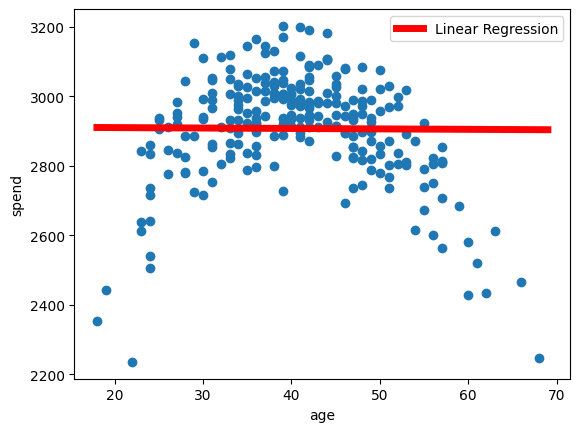

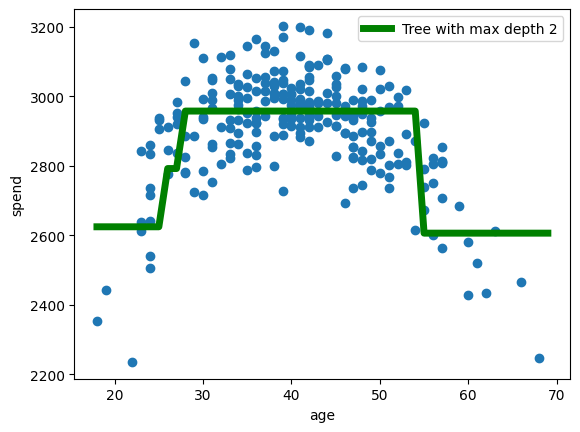

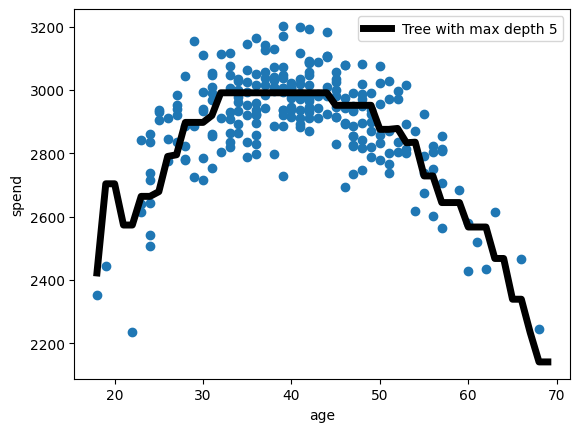

Max depth of 2 RMSE: 116.57417072810561
Max depth of 5 RMSE: 109.05510027963649


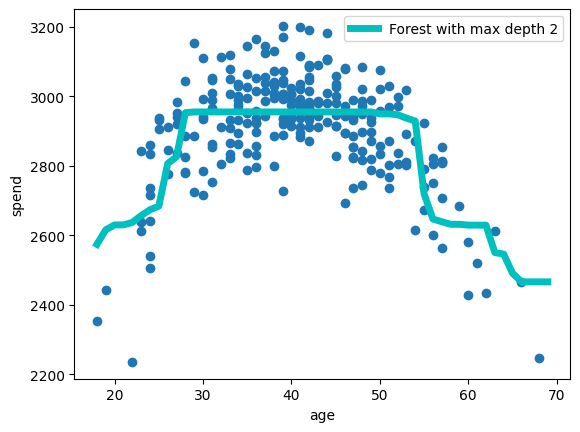

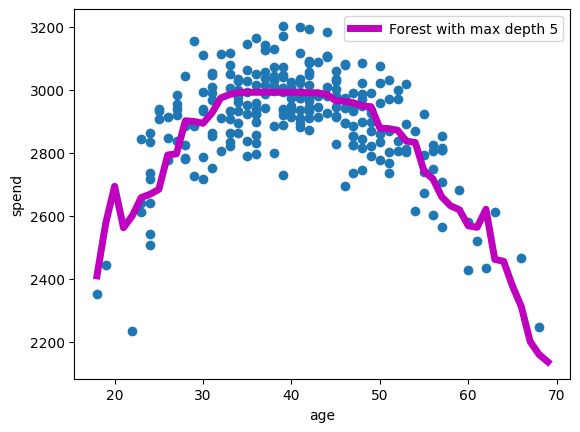

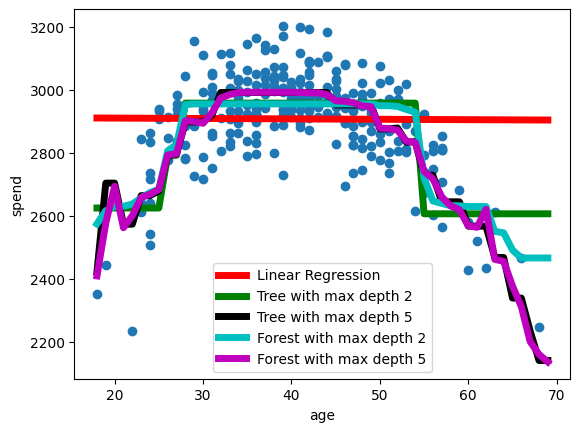

In [38]:

#Activity 6.03 Using Tree-Based Regression Models to Capture Non-Linear Trends

#Load in the data frame
df = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter06/Exercise6.03/age_spend.csv')
df.head()

#Extract the target and predictor variable
X = df[['age']]
y = df['spend']

#Create train test split on the model 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

#Import decision tree regressor with max depth 2, 5
from sklearn.tree import DecisionTreeRegressor

max2_tree_model = DecisionTreeRegressor(max_depth = 2)
max2_tree_model.fit(X_train, y_train)

max5_tree_model = DecisionTreeRegressor(max_depth = 5)
max5_tree_model.fit(X_train, y_train)

#Create Linear Regression 
model = LinearRegression()
model.fit(X_train, y_train)

#Use RMSE and calculate the prediction
linear_predictions = model.predict(X_test)
print('Linear model RMSE: ' + str(mean_squared_error(linear_predictions, y_test)**0.5))
 
max2_tree_predictions = max2_tree_model.predict(X_test)
print('Tree with max depth of 2 RMSE: ' + str(mean_squared_error(max2_tree_predictions, y_test)**0.5))
 
max5_tree_predictions = max5_tree_model.predict(X_test)
print('tree with max depth of 5 RMSE: ' + str(mean_squared_error(max5_tree_predictions, y_test)**0.5))


#Create a variable ages to contain all age 18-70
%matplotlib
ages = pd.DataFrame({'age':range(18,70)})

#Create a scatterplot with test data and predictions
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, model.predict(ages), linewidth = 5, color = 'red', label = "Linear Regression")
plt.xlabel("age")
plt.ylabel("spend")
plt.legend()
plt.show()


#Create another scatterplot with treemodel on top 
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, max2_tree_model.predict(ages), color = 'g', linewidth = 5, label = "Tree with max depth 2")
plt.xlabel("age")
plt.ylabel("spend")
plt.legend()
plt.show()

#Create another scatterplot with treemodel 5 on top 
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, max5_tree_model.predict(ages), color = 'k', linewidth = 5, label = "Tree with max depth 5")
plt.xlabel("age")
plt.ylabel("spend")
plt.legend()
plt.show()

#Perform random forest regression on the same data 
from sklearn.ensemble import RandomForestRegressor
max2_forest_model = RandomForestRegressor(max_depth = 2, random_state = 10 )
max2_forest_model.fit(X_train, y_train)
max5_forest_model = RandomForestRegressor(max_depth = 5, random_state = 10 )
max5_forest_model.fit(X_train, y_train)

#Calculate the RMSE for the random forest 
max2_forest_predictions = max2_forest_model.predict(X_test)
print('Max depth of 2 RMSE: {}'.format(mean_squared_error(max2_forest_predictions, y_test) ** 0.5))

max5_forest_predictions = max5_forest_model.predict(X_test)
print('Max depth of 5 RMSE: {}'.format(mean_squared_error(max5_forest_predictions, y_test) ** 0.5))


#Create a new scatterplot with random forest max depth 2
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, max2_forest_model.predict(ages), color = 'c', linewidth = 5, label = "Forest with max depth 2")
plt.xlabel("age")
plt.ylabel("spend")
plt.legend()
plt.show()


#Create a new scatterplot with random forest max depth 5
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, max5_forest_model.predict(ages), color = 'm', linewidth = 5, label = "Forest with max depth 5")
plt.xlabel("age")
plt.ylabel("spend")
plt.legend()
plt.show()

#plot all together now 
plt.scatter(X_test.age.tolist(), y_test.tolist())
plt.plot(ages, model.predict(ages), linewidth = 5, color = 'r', label = "Linear Regression")
plt.plot(ages, max2_tree_model.predict(ages), color = 'g', linewidth = 5, label = "Tree with max depth 2")
plt.plot(ages, max5_tree_model.predict(ages), color = 'k', linewidth = 5, label = "Tree with max depth 5")
plt.plot(ages, max2_forest_model.predict(ages), color = 'c', linewidth = 5, label = "Forest with max depth 2")
plt.plot(ages, max5_forest_model.predict(ages), color = 'm', linewidth = 5, label = "Forest with max depth 5")
plt.xlabel("age")
plt.ylabel("spend")
plt.legend()
plt.show()

In [43]:
#Activity 6.03 Building the Best Regression Model for Customer Spend Based on Demographic Data

#Load in the data
df = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter06/Activity6.03/spend_age_income_ed.csv')

#Extract X and Y 
X = df[['age','income','years_of_education']]
y = df['spend']

#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 10)

#Fit linear regression model 
model = LinearRegression()
model.fit(X_train,y_train)

#Fit two regression models max depth 2 and 5 
max2_tree_model = DecisionTreeRegressor(max_depth=2)
max2_tree_model.fit(X_train,y_train)

max5_tree_model = DecisionTreeRegressor(max_depth=5)
max5_tree_model.fit(X_train,y_train)

#Create Forest Models 
max2_forest_model = RandomForestRegressor(max_depth = 2, random_state = 10 )
max2_forest_model.fit(X_train, y_train)
max5_forest_model = RandomForestRegressor(max_depth = 5, random_state = 10 )
max5_forest_model.fit(X_train, y_train)


#Print out the RMSE
linear_predictions = model.predict(X_test)
print('Linear model RMSE: ' + str(mean_squared_error(linear_predictions, y_test)**0.5))
max2_tree_predictions = max2_tree_model.predict(X_test)
print('Tree with max depth of 2 RMSE: ' + str(mean_squared_error(max2_tree_predictions, y_test)**0.5))
max5_tree_predictions = max5_tree_model.predict(X_test)
print('tree with max depth of 5 RMSE: ' + str(mean_squared_error(max5_tree_predictions, y_test)**0.5))
max2_forest_predictions = max2_forest_model.predict(X_test)
print('Max depth of 2 RMSE: {}'.format(mean_squared_error(max2_forest_predictions, y_test) ** 0.5))

max5_forest_predictions = max5_forest_model.predict(X_test)
print('Max depth of 5 RMSE: {}'.format(mean_squared_error(max5_forest_predictions, y_test) ** 0.5))

Linear model RMSE: 348.19771532747865
Tree with max depth of 2 RMSE: 268.51069264082935
tree with max depth of 5 RMSE: 125.53257106419696
Max depth of 2 RMSE: 266.45844988320863
Max depth of 5 RMSE: 115.2014058797442
